<a href="https://colab.research.google.com/github/mohamedrafat9/ml_algos/blob/main/taskkkk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
import pandas as pd


dia = pd.read_csv("/content/diabetes.csv")
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [212]:
!pip install catboost

In [260]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

In [261]:
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [262]:
dia.shape

(768, 9)

In [263]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [264]:
print(dia.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


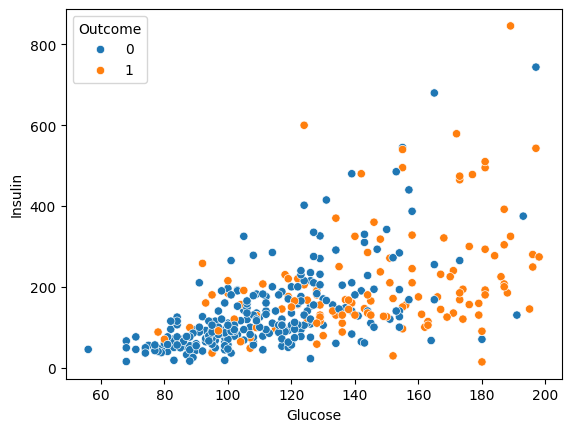

In [265]:
sns.scatterplot(data=dia,x=dia.Glucose,y=dia.Insulin,hue='Outcome')
plt.show()

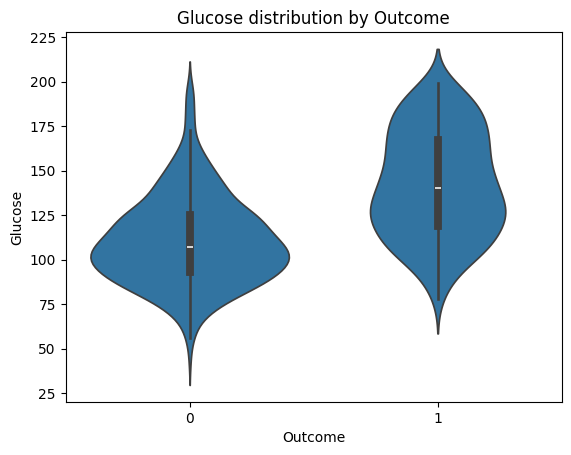

In [266]:
sns.violinplot(data=dia, x="Outcome", y="Glucose")
plt.title("Glucose distribution by Outcome")
plt.show()

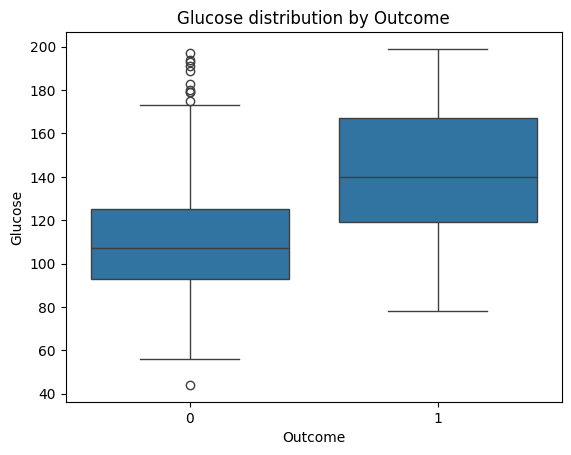

In [267]:
sns.boxplot(data=dia, x="Outcome", y="Glucose")
plt.title("Glucose distribution by Outcome")
plt.show()

In [268]:
zerocounts = (dia == 0).sum()
print(zerocounts)

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [269]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
dia[cols] = dia[cols].replace(0, np.nan)

In [270]:
print(dia.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [284]:
x = dia.drop("Outcome", axis=1)
y = dia["Outcome"]

In [285]:
from sklearn.impute import KNNImputer
from sklearn.metrics import f1_score
# for k in range(1,32,2):

#     imputer = KNNImputer(n_neighbors=k)
#     x_imputed = imputer.fit_transform(x)


#     x_train, x_test, y_train, y_test = train_test_split(x_imputed, y, test_size=0.2, random_state=42, stratify=y )


#     model = LogisticRegression(max_iter=1000)
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)


#     f1 = f1_score(y_test, y_pred, average="weighted")
#     print(f"{k} : Score {f1}")

In [286]:
# imputer = KNNImputer(n_neighbors=7)
# dia_imputed = pd.DataFrame(imputer.fit_transform(dia), columns=dia.columns)

# print(dia_imputed.isna().sum())
# Glucose                       5
# BloodPressure                35
# SkinThickness               227
# Insulin                     374
# BMI                          11
dia_imputed = dia.copy()

cols_k = {
    "Glucose":1,
    "BloodPressure": 3,
    "SkinThickness": 7,
    "Insulin": 13,
    "BMI": 3
}
# cols_k = {
#     "Glucose": 1,
#     "BloodPressure": 3,
#     "SkinThickness": 7,
#     "Insulin": 13,
#     "BMI": 3
# }

for col, k in cols_k.items():
    imputer = KNNImputer(n_neighbors=k)
    temp = imputer.fit_transform(dia_imputed)
    dia_imputed[col] = temp[:, dia_imputed.columns.get_loc(col)]

print(dia_imputed.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


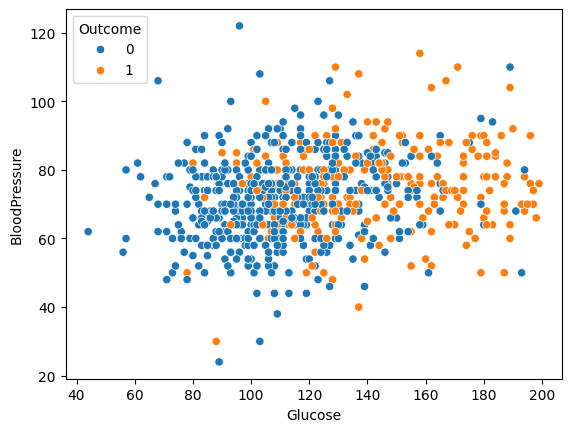

In [287]:
sns.scatterplot(data=dia,x=dia.Glucose,y=dia.BloodPressure,hue='Outcome')
plt.show()

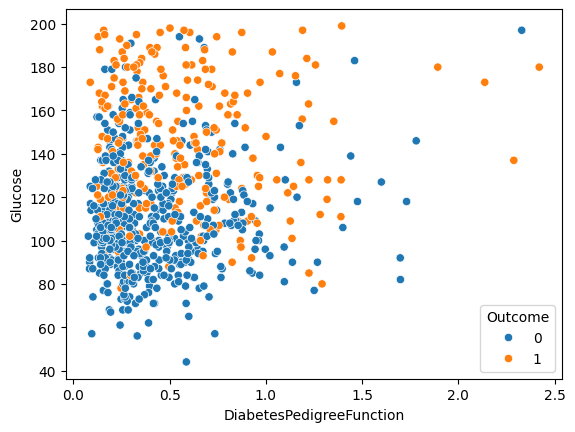

In [288]:
sns.scatterplot(data=dia,x=dia.DiabetesPedigreeFunction,y=dia.Glucose,hue='Outcome')
plt.show()

In [289]:
x = dia_imputed.drop("Outcome", axis=1)
y = dia_imputed["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42, stratify=y)

## Random Forest

In [290]:
from sklearn.metrics import f1_score, classification_report
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
f1 = f1_score(y_test, y_pred, average="weighted")
print(f1)
print(classification_report(y_test,y_pred))
# 0.72

0.7378112083994437
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       100
           1       0.64      0.59      0.62        54

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



## DT

0.8083228101069314
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       100
           1       0.69      0.81      0.75        54

    accuracy                           0.81       154
   macro avg       0.79      0.81      0.79       154
weighted avg       0.82      0.81      0.81       154



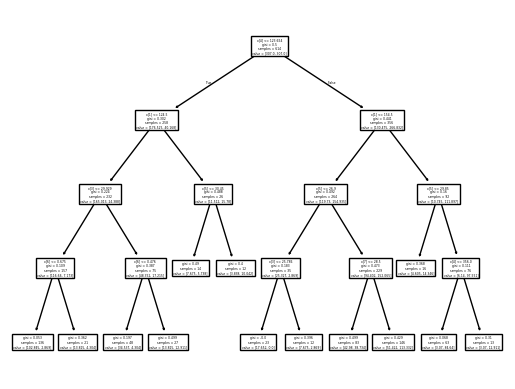

In [298]:
 dt=DecisionTreeClassifier(
                            criterion='gini',
                            max_depth=4,
                            min_samples_split=4,
                            min_samples_leaf=12,
                            max_features=None,
                            class_weight='balanced',
                            random_state=42
                        )
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(f1_score(y_test, y_pred, average="weighted"))
print(classification_report(y_test, y_pred))
tree.plot_tree(dt)
plt.show()
# 0.78
# Best params: ('gini', 4, 2, 12, None, 'balanced')

In [292]:
# for depth in range(1,20):
#     dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
#     dt.fit(x_train, y_train)
#     y_pred = dt.predict(x_test)
#     f1 = f1_score(y_test, y_pred, average="weighted")
#     print(f"max_depth={depth}, F1={f1:.4f}")
#     # 77


criterions = ["gini", "entropy", "log_loss"]
depths = range(1, 20)
splits = [2, 5, 10 ,15, 20,25]
leaves = [1, 2, 4, 6,8,10,12]
features = [None, "sqrt", "log2"]
weights = [None, "balanced"]

best_f1 = 0
best_params = None

for crit in criterions:
    for depth in depths:
        for split in splits:
            for leaf in leaves:
                for feat in features:
                    for weight in weights:
                        dt = DecisionTreeClassifier(
                            criterion=crit,
                            max_depth=depth,
                            min_samples_split=split,
                            min_samples_leaf=leaf,
                            max_features=feat,
                            class_weight=weight,
                            random_state=42
                        )
                        dt.fit(x_train, y_train)
                        y_pred = dt.predict(x_test)
                        f1 = f1_score(y_test, y_pred, average="weighted")
                        print(f"crit={crit}, depth={depth}, split={split}, leaf={leaf}, feat={feat}, weight={weight}, F1={f1:.4f}")

                        if f1 > best_f1:
                            best_f1 = f1
                            best_params = (crit, depth, split, leaf, feat, weight)

print("\nBest F1:", best_f1)
print("Best params:", best_params)


Streaming output truncated to the last 5000 lines.
crit=entropy, depth=19, split=5, leaf=1, feat=None, weight=balanced, F1=0.7013
crit=entropy, depth=19, split=5, leaf=1, feat=sqrt, weight=None, F1=0.6310
crit=entropy, depth=19, split=5, leaf=1, feat=sqrt, weight=balanced, F1=0.7095
crit=entropy, depth=19, split=5, leaf=1, feat=log2, weight=None, F1=0.6985
crit=entropy, depth=19, split=5, leaf=1, feat=log2, weight=balanced, F1=0.6086
crit=entropy, depth=19, split=5, leaf=2, feat=None, weight=None, F1=0.6927
crit=entropy, depth=19, split=5, leaf=2, feat=None, weight=balanced, F1=0.7025
crit=entropy, depth=19, split=5, leaf=2, feat=sqrt, weight=None, F1=0.6837
crit=entropy, depth=19, split=5, leaf=2, feat=sqrt, weight=balanced, F1=0.7482
crit=entropy, depth=19, split=5, leaf=2, feat=log2, weight=None, F1=0.6762
crit=entropy, depth=19, split=5, leaf=2, feat=log2, weight=balanced, F1=0.6226
crit=entropy, depth=19, split=5, leaf=4, feat=None, weight=None, F1=0.7332
crit=entropy, depth=19, s

## XGB

In [293]:
xg_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=3,
    min_child_weight= 5,
    learning_rate=0.01,
    subsample=1,
    gamma=0.1,
    colsample_bytree=1,
)

xg_model.fit(x_train, y_train)


y_pred = xg_model.predict(x_test)


print(f1_score(y_test, y_pred, average="weighted"))
print(classification_report(y_test, y_pred))
# .73

0.7198515769944341
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.64      0.52      0.57        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



In [294]:

!pip install lightgbm

## LGB

In [295]:
import lightgbm as lgb
from sklearn.metrics import f1_score, classification_report

lgb_model = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.05,
    random_state=42,
    verbose=-1
)

lgb_model.fit(x_train, y_train)


y_pred_lgb = lgb_model.predict(x_test)
print(f1_score(y_test, y_pred_lgb, average="weighted"))
print(classification_report(y_test, y_pred_lgb))

0.765185682988784
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.67      0.65      0.66        54

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



#CatBoost F1-score: 0.7699873721283178




In [299]:
from catboost import CatBoostClassifier


cat_model = CatBoostClassifier(
    iterations=300,
    depth=5,
    learning_rate=0.05,
    verbose=0,
    random_state=42
)

cat_model.fit(x_train, y_train)


y_pred_cat = cat_model.predict(x_test)
print("CatBoost F1-score:", f1_score(y_test, y_pred_cat, average="weighted"))
print(classification_report(y_test, y_pred_cat))

CatBoost F1-score: 0.7364029459974635
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       100
           1       0.65      0.57      0.61        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154

